# Analyse sociodémographique

In [159]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [160]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd
import unicodedata
import requests
import io
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
!pip install -q openpyxl
!pip install prince

# Etude générale

Naissances

In [161]:
file_path3 = '/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Naissances/Naissances_tnat.xlsx'
df_nais = pd.read_excel(file_path3)
df_nais

,Unnamed: 0,France métropolitiane,Unnamed: 2,France (a),Unnamed: 4
0,2014,781167,12.2,818565,12.4
1,2015,760421,11.8,798948,12.0
2,2016,744697,11.5,783640,11.8
3,2017,730242,11.3,769553,11.5
4,2018,719737,11.1,758590,11.3
5,2019,714029,11.0,753383,11.2
6,2020,696664,10.7,735196,10.9
7,2021,701819,10.7,742052,10.9
8,2022,686564,10.4,725997,10.7
9,2023,639533,9.7,677803,9.9


In [162]:
print(df_nais.head())

   Unnamed: 0  France métropolitiane  Unnamed: 2  France (a)  Unnamed: 4
0        2014                 781167        12.2      818565        12.4
1        2015                 760421        11.8      798948        12.0
2        2016                 744697        11.5      783640        11.8
3        2017                 730242        11.3      769553        11.5
4        2018                 719737        11.1      758590        11.3


In [163]:
print(df_nais.columns)

Index(['Unnamed: 0', 'France métropolitiane', 'Unnamed: 2', 'France (a)',
       'Unnamed: 4'],
      dtype='object')


In [164]:
df_nais['Année'] = df_nais['Unnamed: 0'].astype(int)
df_nais['Taux natalité'] = df_nais['Unnamed: 4']
df_nais.drop(columns=['Unnamed: 0'], inplace=True)
df_nais.drop(columns=['Unnamed: 2'], inplace=True)
df_nais.drop(columns=['Unnamed: 4'], inplace=True)
df_nais

,France métropolitiane,France (a),Année,Taux natalité
0,781167,818565,2014,12.4
1,760421,798948,2015,12.0
2,744697,783640,2016,11.8
3,730242,769553,2017,11.5
4,719737,758590,2018,11.3
5,714029,753383,2019,11.2
6,696664,735196,2020,10.9
7,701819,742052,2021,10.9
8,686564,725997,2022,10.7
9,639533,677803,2023,9.9


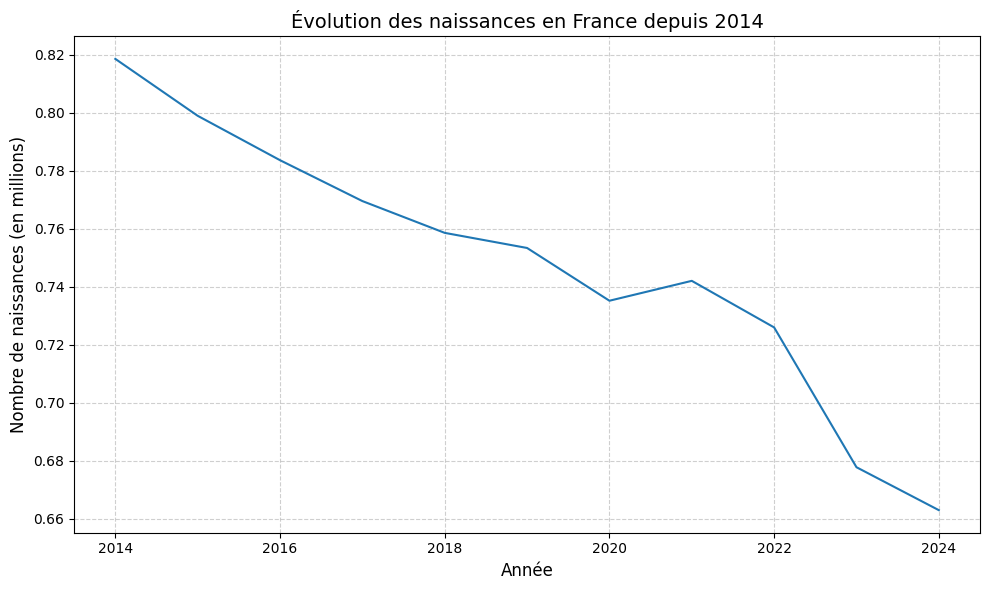

In [165]:
colonnes = ['France (a)']
df_nais[colonnes] = df_nais[colonnes] / 1e6 #en million pour harmoniser

plt.figure(figsize=(10, 6))
for colonne in colonnes:
    plt.plot(df_nais['Année'], df_nais[colonne], label=colonne)

plt.title("Évolution des naissances en France depuis 2014", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de naissances (en millions)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Décès

In [166]:
file_path4= '/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Naissances/Deces_tmort.xlsx'
df_deces = pd.read_excel(file_path4)
print(df_deces.head())

   Unnamed: 0  France métropolitaine  Unnamed: 2  France (a)  Unnamed: 4
0        2014                 547003         8.5      559293         8.4
1        2015                 581770         9.0      593680         8.9
2        2016                 581073         9.0      593865         8.9
3        2017                 593606         9.2      606274         9.1
4        2018                 596552         9.2      609648         9.1


In [167]:
print(df_deces.columns)

Index(['Unnamed: 0', 'France métropolitaine', 'Unnamed: 2', 'France (a)',
       'Unnamed: 4'],
      dtype='object')


In [168]:
df_deces['Année'] = df_deces['Unnamed: 0'].astype(int)
df_deces['Taux marital'] = df_deces['Unnamed: 4']
df_deces.drop(columns=['Unnamed: 0'], inplace=True)
df_deces.drop(columns=['Unnamed: 2'], inplace=True)
df_deces.drop(columns=['Unnamed: 4'], inplace=True)
df_deces

,France métropolitaine,France (a),Année,Taux marital
0,547003,559293,2014,8.4
1,581770,593680,2015,8.9
2,581073,593865,2016,8.9
3,593606,606274,2017,9.1
4,596552,609648,2018,9.1
5,599408,613243,2019,9.1
6,654599,668922,2020,9.9
7,644201,661585,2021,9.7
8,658434,675122,2022,9.9
9,623959,639269,2023,9.4


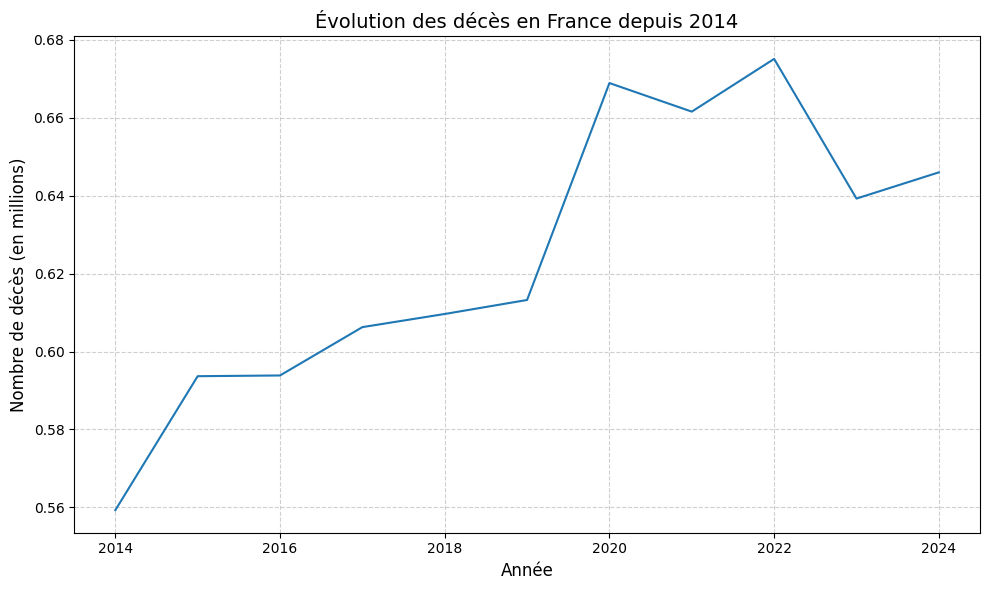

In [169]:
colonnes = ['France (a)']
df_deces[colonnes] = df_deces[colonnes] / 1e6 #harmoniser

plt.figure(figsize=(10, 6))
for colonne in colonnes:
    plt.plot(df_deces['Année'], df_deces[colonne], label=colonne)

plt.title("Évolution des décès en France depuis 2014", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de décès (en millions)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Mariages

In [170]:
file_path5 = '/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Naissances/Mariages.xlsx'
df_mariage = pd.read_excel(file_path5)
print(df_mariage.head())

   Année  Ensemble des mariages  Mariages entre personnes de sexe différent  \
0   2014                 241292                                      230770   
1   2015                 236316                                      228565   
2   2016                 232725                                      225612   
3   2017                 233915                                      226671   
4   2018                 234735                                      228349   

   Mariages entre personnes de même sexe dont : Mariages entre femmes  \
0                                  10522                         4856   
1                                   7751                         3666   
2                                   7113                         3441   
3                                   7244                         3607   
4                                   6386                         3118   

  dont :\nMariages entre hommes  Taux de nuptialité pour 1 000 habitants  
0          

In [171]:
print(df_mariage.columns)

Index(['Année', 'Ensemble des mariages',
       'Mariages entre personnes de sexe différent',
       'Mariages entre personnes de même sexe', 'dont : Mariages entre femmes',
       'dont :\nMariages entre hommes',
       'Taux de nuptialité pour 1 000 habitants'],
      dtype='object')


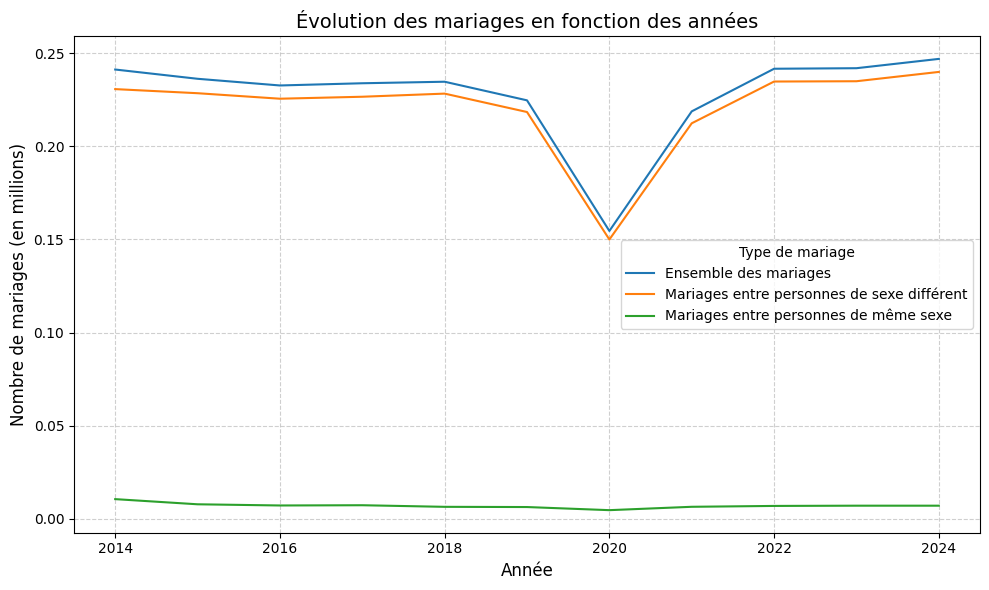

In [172]:
colonnes = ['Ensemble des mariages',
    'Mariages entre personnes de sexe différent',
    'Mariages entre personnes de même sexe']

df_mariage[colonnes] = df_mariage[colonnes] / 1e6 #harmoniser

plt.figure(figsize=(10, 6))
for colonne in colonnes:
    plt.plot(df_mariage['Année'], df_mariage[colonne], label=colonne)

plt.title("Évolution des mariages en fonction des années", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de mariages (en millions)", fontsize=12)
plt.legend(title="Type de mariage", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [173]:
df_deces_mariage_nais = pd.merge(df_mariage, df_deces, on='Année', how='outer')
df_deces_mariage_nais = pd.merge(df_deces_mariage_nais, df_nais, on='Année', how='outer')

df_deces_mariage_nais = df_deces_mariage_nais.sort_values(by='Année').reset_index(drop=True)

print(df_deces_mariage_nais)

    Année  Ensemble des mariages  Mariages entre personnes de sexe différent  \
0    2014               0.241292                                    0.230770   
1    2015               0.236316                                    0.228565   
2    2016               0.232725                                    0.225612   
3    2017               0.233915                                    0.226671   
4    2018               0.234735                                    0.228349   
5    2019               0.224740                                    0.218468   
6    2020               0.154581                                    0.149983   
7    2021               0.218819                                    0.212413   
8    2022               0.241710                                    0.234841   
9    2023               0.242000                                    0.235000   
10   2024               0.247000                                    0.240000   

    Mariages entre personnes de même se

Naissance par ville

In [174]:
file_path5 = '/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Naissances/NAIS_DOM_ANNUELLES.xlsx'
df_nais_ville = pd.read_excel(file_path5, sheet_name='COM')
print(df_nais_ville.head())

  Unnamed: 0               Unnamed: 1  2014  2015  2016  2017  2018  2019  \
0      01001  L'Abergement-Clémenciat     8    13     7     8    10     4   
1      01002    L'Abergement-de-Varey     3     5     6     4     1     1   
2      01004        Ambérieu-en-Bugey   238   222   220   204   229   220   
3      01005      Ambérieux-en-Dombes    17    15    14    18    21    22   
4      01006                  Ambléon     1     2     2     1     0     1   

   2020  2021  2022  2023  
0    10    12     8    11  
1     1     1     4     1  
2   237   215   231   200  
3    21    41    34    28  
4     0     1     1     1  


In [175]:
print(df_nais_ville.columns)

Index(['Unnamed: 0', 'Unnamed: 1', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


In [176]:
df_nais_ville['commune'] = df_nais_ville['Unnamed: 1']
df_nais_ville.drop(columns=['Unnamed: 1'], inplace=True)
df_nais_ville

,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,commune
0,01001,8,13,7,8,10,4,10,12,8,11,L'Abergement-Clémenciat
1,01002,3,5,6,4,1,1,1,1,4,1,L'Abergement-de-Varey
2,01004,238,222,220,204,229,220,237,215,231,200,Ambérieu-en-Bugey
3,01005,17,15,14,18,21,22,21,41,34,28,Ambérieux-en-Dombes
4,01006,1,2,2,1,0,1,0,1,1,1,Ambléon
...,...,...,...,...,...,...,...,...,...,...,...,...
34702,97613,176,222,205,212,192,202,184,236,213,214,M'Tsangamouji
34703,97614,260,359,355,387,345,377,408,420,469,459,Ouangani
34704,97615,224,273,290,272,321,275,294,296,308,262,Pamandzi
34705,97616,319,362,353,350,333,282,317,348,395,358,Sada


In [177]:
# Fonction pour normaliser les noms des villes
def normaliser_nom(nom):
    if isinstance(nom, str):
        nom = ''.join(c for c in unicodedata.normalize('NFD', nom) if unicodedata.category(c) != 'Mn')
        nom = nom.lower().strip().replace(' ', '')
    return nom

In [178]:
df_nais_ville['commune'] = df_nais_ville['commune'].apply(normaliser_nom)
df_nais_ville

,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,commune
0,01001,8,13,7,8,10,4,10,12,8,11,l'abergement-clemenciat
1,01002,3,5,6,4,1,1,1,1,4,1,l'abergement-de-varey
2,01004,238,222,220,204,229,220,237,215,231,200,amberieu-en-bugey
3,01005,17,15,14,18,21,22,21,41,34,28,amberieux-en-dombes
4,01006,1,2,2,1,0,1,0,1,1,1,ambleon
...,...,...,...,...,...,...,...,...,...,...,...,...
34702,97613,176,222,205,212,192,202,184,236,213,214,m'tsangamouji
34703,97614,260,359,355,387,345,377,408,420,469,459,ouangani
34704,97615,224,273,290,272,321,275,294,296,308,262,pamandzi
34705,97616,319,362,353,350,333,282,317,348,395,358,sada


In [179]:
df_nais_ville.columns

Index(['Unnamed: 0', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', 'commune'],
      dtype='object')

# Population française

In [180]:
file_path = '/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Habitants par ville/POPULATION_MUNICIPALE_COMMUNES_FRANCE.xlsx'
df = pd.read_excel(file_path)

# Afficher les premières lignes du fichier
print(df.head())

   objectid  reg dep    cv codgeo                 libgeo  p13_pop  p14_pop  \
0    115658   52  85  8502  85062            Châteauneuf    968.0    993.0   
1    115659   26  58  5808  58300                   Urzy   1839.0   1835.0   
2    115660   43  70  7012  70137  Chassey-lès-Montbozon    218.0    217.0   
3    115661   21  51  5123  51649      Vitry-le-François  13174.0  13144.0   
4    115662   11  78  7811  78638         Vaux-sur-Seine   4749.0   4715.0   

   p15_pop  p16_pop  p17_pop  p18_pop  p19_pop  p20_pop  p21_pop  
0   1013.0   1027.0     1056   1085.0   1114.0   1118.0   1134.0  
1   1828.0   1802.0     1775   1749.0   1746.0   1747.0   1742.0  
2    216.0    215.0      217    215.0    215.0    220.0    225.0  
3  12805.0  12552.0    12133  11743.0  11376.0  11458.0  11454.0  
4   4788.0   4857.0     4927   4929.0   5010.0   5020.0   5083.0  


In [181]:
print(df.columns)

Index(['objectid', 'reg', 'dep', 'cv', 'codgeo', 'libgeo', 'p13_pop',
       'p14_pop', 'p15_pop', 'p16_pop', 'p17_pop', 'p18_pop', 'p19_pop',
       'p20_pop', 'p21_pop'],
      dtype='object')


In [182]:
unique_values = {column: df[column].unique() for column in df}

for column, values in unique_values.items():
    print(f"Colonne: {column}")
    print(f"Valeurs uniques: {values}\n")

Colonne: objectid
Valeurs uniques: [115658 115659 115660 ... 110253 110254 110255]

Colonne: reg
Valeurs uniques: [52 26 43 21 11 83 41 91 23 82 25 72 22 73 31 53 24 42 74  3 54 93  1 94
  2  4 28]

Colonne: dep
Valeurs uniques: ['85' '58' '70' '51' '78' '63' '57' '66' '27' '42' '15' '14' '47' '60'
 '39' '73' '50' '25' '12' '59' '35' '40' '24' '11' '41' '89' '32' '21'
 '09' '43' '30' '76' '80' '37' '81' '65' '62' '67' '55' '10' '45' '07'
 '08' '38' '22' '31' '71' '54' '52' '44' '64' '23' '02' '36' '82' '46'
 '973' '77' '26' '01' '16' '95' '74' '28' '68' '72' '87' '86' '88' '34'
 '84' '33' '18' '90' '56' '04' '83' '05' '91' '06' '17' '03' '971' '69'
 '13' '61' '79' '49' '19' '53' '92' '75' '48' '29' '2A' '2B' '94' '93'
 '972' '974']

Colonne: cv
Valeurs uniques: ['8502' '5808' '7012' ... '1599' '9494' '0598']

Colonne: codgeo
Valeurs uniques: ['85062' '58300' '70137' ... '86138' '33184' '24354']

Colonne: libgeo
Valeurs uniques: ['Châteauneuf' 'Urzy' 'Chassey-lès-Montbozon' ... 'Febvin-

In [183]:
#Début de l'analyse en 2017 donc garder le rescensement de 2014
df = df.drop(columns=['p13_pop'])
print(df.head())

   objectid  reg dep    cv codgeo                 libgeo  p14_pop  p15_pop  \
0    115658   52  85  8502  85062            Châteauneuf    993.0   1013.0   
1    115659   26  58  5808  58300                   Urzy   1835.0   1828.0   
2    115660   43  70  7012  70137  Chassey-lès-Montbozon    217.0    216.0   
3    115661   21  51  5123  51649      Vitry-le-François  13144.0  12805.0   
4    115662   11  78  7811  78638         Vaux-sur-Seine   4715.0   4788.0   

   p16_pop  p17_pop  p18_pop  p19_pop  p20_pop  p21_pop  
0   1027.0     1056   1085.0   1114.0   1118.0   1134.0  
1   1802.0     1775   1749.0   1746.0   1747.0   1742.0  
2    215.0      217    215.0    215.0    220.0    225.0  
3  12552.0    12133  11743.0  11376.0  11458.0  11454.0  
4   4857.0     4927   4929.0   5010.0   5020.0   5083.0  


In [184]:
#Je renomme pour mieux repérer les colonnes
df = df.rename(columns={'p21_pop': 'population 2024'})
df = df.rename(columns={'p20_pop': 'population 2023'})
df = df.rename(columns={'p19_pop': 'population 2022'})
df = df.rename(columns={'p18_pop': 'population 2021'})
df = df.rename(columns={'p17_pop': 'population 2020'})
df = df.rename(columns={'p16_pop': 'population 2019'})
df = df.rename(columns={'p15_pop': 'population 2018'})
df = df.rename(columns={'p14_pop': 'population 2017'})
df

,objectid,reg,dep,cv,codgeo,libgeo,population 2017,population 2018,population 2019,population 2020,population 2021,population 2022,population 2023,population 2024
0,115658,52,85,8502,85062,Châteauneuf,993.0,1013.0,1027.0,1056,1085.0,1114.0,1118.0,1134.0
1,115659,26,58,5808,58300,Urzy,1835.0,1828.0,1802.0,1775,1749.0,1746.0,1747.0,1742.0
2,115660,43,70,7012,70137,Chassey-lès-Montbozon,217.0,216.0,215.0,217,215.0,215.0,220.0,225.0
3,115661,21,51,5123,51649,Vitry-le-François,13144.0,12805.0,12552.0,12133,11743.0,11376.0,11458.0,11454.0
4,115662,11,78,7811,78638,Vaux-sur-Seine,4715.0,4788.0,4857.0,4927,4929.0,5010.0,5020.0,5083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34990,110251,31,62,6225,62327,Febvin-Palfart,583.0,592.0,596.0,600,604.0,609.0,614.0,619.0
34991,110252,73,12,1201,12156,Montpeyroux,549.0,547.0,546.0,541,534.0,532.0,528.0,523.0
34992,110253,54,86,8610,86138,Luchapt,269.0,263.0,256.0,249,250.0,250.0,251.0,249.0
34993,110254,72,33,3320,33184,Générac,566.0,555.0,544.0,541,537.0,541.0,544.0,548.0


In [185]:
df.columns

Index(['objectid', 'reg', 'dep', 'cv', 'codgeo', 'libgeo', 'population 2017',
       'population 2018', 'population 2019', 'population 2020',
       'population 2021', 'population 2022', 'population 2023',
       'population 2024'],
      dtype='object')

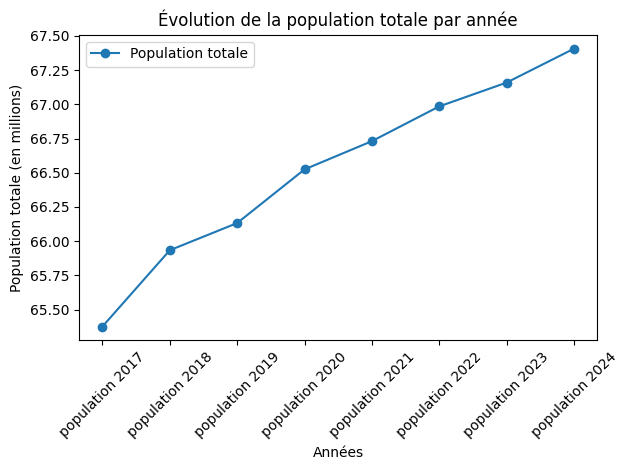

In [186]:
#Graphe d'évolution
annees_pop = ['population 2017', 'population 2018', 'population 2019',
         'population 2020', 'population 2021', 'population 2022',
         'population 2023', 'population 2024']

df_sum = df[annees_pop].sum()

# Convertir les populations en millions pour afficher uniformément pour le dashboard
df_sum_millions = df_sum / 1e6

plt.plot(annees_pop, df_sum_millions, marker='o', label='Population totale')
plt.xlabel('Années')
plt.ylabel('Population totale (en millions)')
plt.title("Évolution de la population totale par année")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [187]:
df['moyenne_population'] = df[['population 2017', 'population 2018', 'population 2019','population 2020',
                               'population 2021', 'population 2022', 'population 2021', 'population 2022', 'population 2023', ]].mean(axis=1)
df

,objectid,reg,dep,cv,codgeo,libgeo,population 2017,population 2018,population 2019,population 2020,population 2021,population 2022,population 2023,population 2024,moyenne_population
0,115658,52,85,8502,85062,Châteauneuf,993.0,1013.0,1027.0,1056,1085.0,1114.0,1118.0,1134.0,1067.222222
1,115659,26,58,5808,58300,Urzy,1835.0,1828.0,1802.0,1775,1749.0,1746.0,1747.0,1742.0,1775.222222
2,115660,43,70,7012,70137,Chassey-lès-Montbozon,217.0,216.0,215.0,217,215.0,215.0,220.0,225.0,216.111111
3,115661,21,51,5123,51649,Vitry-le-François,13144.0,12805.0,12552.0,12133,11743.0,11376.0,11458.0,11454.0,12036.666667
4,115662,11,78,7811,78638,Vaux-sur-Seine,4715.0,4788.0,4857.0,4927,4929.0,5010.0,5020.0,5083.0,4909.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34990,110251,31,62,6225,62327,Febvin-Palfart,583.0,592.0,596.0,600,604.0,609.0,614.0,619.0,601.222222
34991,110252,73,12,1201,12156,Montpeyroux,549.0,547.0,546.0,541,534.0,532.0,528.0,523.0,538.111111
34992,110253,54,86,8610,86138,Luchapt,269.0,263.0,256.0,249,250.0,250.0,251.0,249.0,254.222222
34993,110254,72,33,3320,33184,Générac,566.0,555.0,544.0,541,537.0,541.0,544.0,548.0,545.111111


Avec le nombre de naissances

In [188]:
df['libgeo'] = df['libgeo'].str.strip().str.lower()
df_nais_ville['commune'] = df_nais_ville['commune'].str.strip().str.lower()

df_merged_nais = pd.merge(df, df_nais_ville, how='inner', left_on='libgeo', right_on='commune')

print(df_merged_nais.head())

   objectid  reg dep    cv codgeo          libgeo  population 2017  \
0    115659   26  58  5808  58300            urzy           1835.0   
1    115662   11  78  7811  78638  vaux-sur-seine           4715.0   
2    115663   83  63  6301  63089         chappes           1635.0   
3    115663   83  63  6301  63089         chappes           1635.0   
4    115663   83  63  6301  63089         chappes           1635.0   

   population 2018  population 2019  population 2020  ...  2015  2016  2017  \
0           1828.0           1802.0             1775  ...    17    26     9   
1           4788.0           4857.0             4927  ...    59    66    47   
2           1665.0           1667.0             1655  ...     4     5     6   
3           1665.0           1667.0             1655  ...     0     1     1   
4           1665.0           1667.0             1655  ...     3     3     1   

   2018  2019 2020  2021  2022  2023         commune  
0    13    20   19    14    14     9            u

In [189]:
df_merged_nais

,objectid,reg,dep,cv,codgeo,libgeo,population 2017,population 2018,population 2019,population 2020,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,commune
0,115659,26,58,5808,58300,urzy,1835.0,1828.0,1802.0,1775,...,17,26,9,13,20,19,14,14,9,urzy
1,115662,11,78,7811,78638,vaux-sur-seine,4715.0,4788.0,4857.0,4927,...,59,66,47,58,62,58,56,69,56,vaux-sur-seine
2,115663,83,63,6301,63089,chappes,1635.0,1665.0,1667.0,1655,...,4,5,6,2,1,2,1,1,3,chappes
3,115663,83,63,6301,63089,chappes,1635.0,1665.0,1667.0,1655,...,0,1,1,1,0,1,1,0,1,chappes
4,115663,83,63,6301,63089,chappes,1635.0,1665.0,1667.0,1655,...,3,3,1,5,4,5,5,0,5,chappes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31603,110252,73,12,1201,12156,montpeyroux,549.0,547.0,546.0,541,...,5,3,4,1,3,2,3,2,6,montpeyroux
31604,110252,73,12,1201,12156,montpeyroux,549.0,547.0,546.0,541,...,4,5,4,5,3,6,4,6,4,montpeyroux
31605,110252,73,12,1201,12156,montpeyroux,549.0,547.0,546.0,541,...,14,14,11,17,9,7,14,19,19,montpeyroux
31606,110252,73,12,1201,12156,montpeyroux,549.0,547.0,546.0,541,...,4,2,4,4,4,5,1,4,2,montpeyroux


In [190]:
df_merged_nais.columns

Index(['objectid', 'reg', 'dep', 'cv', 'codgeo', 'libgeo', 'population 2017',
       'population 2018', 'population 2019', 'population 2020',
       'population 2021', 'population 2022', 'population 2023',
       'population 2024', 'moyenne_population', 'Unnamed: 0', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'commune'],
      dtype='object')

In [191]:
#annees = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
#categories = ['categorie_2017', 'categorie_2018', 'categorie_2019', 'categorie_2020',
#              'categorie_2021', 'categorie_2022', 'categorie_2023', 'categorie_2024']

#data = []
#for annee, cat_col in zip(annees, categories):
   # temp = df_merged_nais.groupby(cat_col)[annee].sum().reset_index()
   # temp['annee'] = annee
   # temp.columns = ['categorie', 'naissances', 'annee']
   # data.append(temp)

#df_evolution = pd.concat(data)

#df_evolution['annee'] = df_evolution['annee'].astype(int)

#plt.figure(figsize=(12, 6))
#for categorie in df_evolution['categorie'].unique():
#    subset = df_evolution[df_evolution['categorie'] == categorie]
#    plt.plot(subset['annee'], subset['naissances'], marker='o', label=categorie)

#plt.title("Évolution des naissances par catégorie (2017-2024)")
#plt.xlabel("Année")
#plt.ylabel("Nombre de naissances")
#plt.legend(title="Catégorie")
#plt.grid()
#plt.show()


Définir les différents types de  villes selon le nombre d'habitants

In [192]:
def classify_population(moy_population):
        if moy_population < 200:
            return 'Petite commune'
        elif 200 <= moy_population < 2000:
            return 'Commune'
        elif 2000 <= moy_population < 100000:
            return 'Petite ville'
        elif 100000 <= moy_population < 400000:
            return 'Grande ville'
        else:
            return 'Métropole'

In [193]:
# Appliquer la fonction 'classify_population' pour chaque colonne de population
df['categorie_2017'] = df['population 2017'].apply(classify_population)
df['categorie_2018'] = df['population 2018'].apply(classify_population)
df['categorie_2019'] = df['population 2019'].apply(classify_population)
df['categorie_2020'] = df['population 2020'].apply(classify_population)
df['categorie_2021'] = df['population 2021'].apply(classify_population)
df['categorie_2022'] = df['population 2022'].apply(classify_population)
df['categorie_2023'] = df['population 2023'].apply(classify_population)
df['categorie_2024'] = df['population 2024'].apply(classify_population)

<Axes: xlabel='année'>

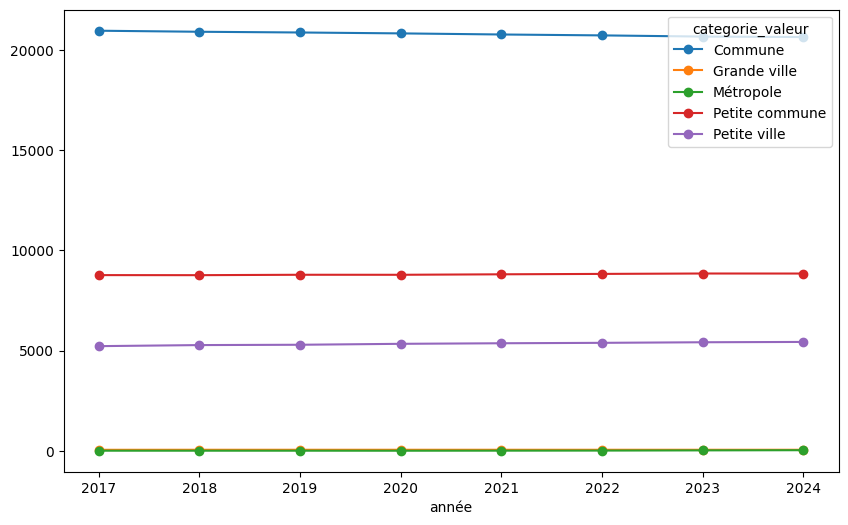

In [194]:
df_long = pd.melt(df, id_vars=['objectid', 'reg', 'dep', 'cv', 'codgeo', 'libgeo'],
                  value_vars=['categorie_2017', 'categorie_2018', 'categorie_2019', 'categorie_2020',
                              'categorie_2021', 'categorie_2022', 'categorie_2023', 'categorie_2024'],
                  var_name='année', value_name='categorie_valeur')

df_long['année'] = df_long['année'].str.extract('(\d{4})').astype(int)

result = df_long.groupby(['année', 'categorie_valeur']).size().unstack(fill_value=0)

result.plot(kind='line', marker='o', figsize=(10, 6))

categorie_2021
Commune           20773
Petite commune     8805
Petite ville       5364
Grande ville         49
Métropole             4
Name: count, dtype: int64
categorie_2021
Commune           0.593599
Petite commune    0.251607
Petite ville      0.153279
Grande ville      0.001400
Métropole         0.000114
Name: count, dtype: float64


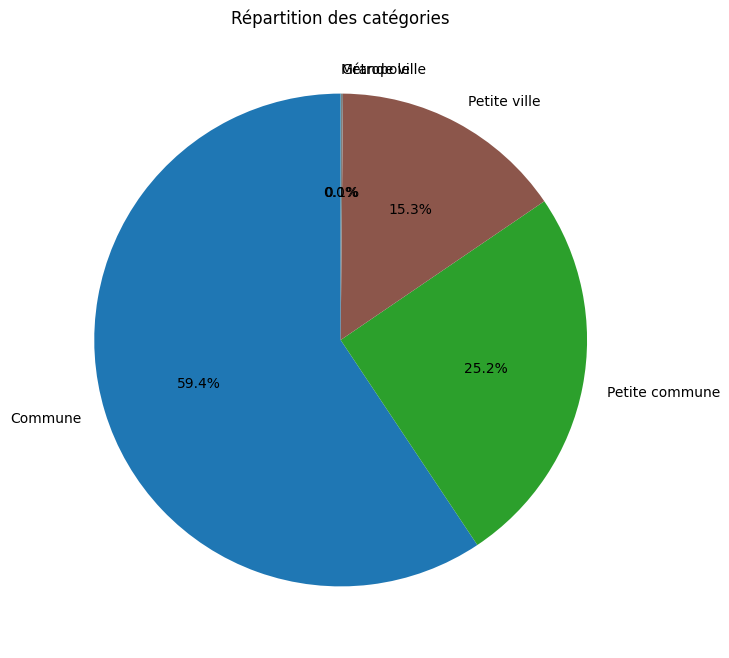

In [195]:
# Calculer les fréquences de chaque catégorie pour l'année 2021 par exemple
categorie_2021_stats = df['categorie_2021'].value_counts()
print(categorie_2021_stats)

proportions_2021 = categorie_2021_stats / categorie_2021_stats.sum()
print(proportions_2021)

plt.figure(figsize=(8, 8))
proportions_2021.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab10')
plt.title('Répartition des catégories')
plt.ylabel('')
plt.show()

In [196]:
df['categorie_2017'].value_counts()
df['categorie_2022'].value_counts()

,count
categorie_2022,
Commune,20728
Petite commune,8825
Petite ville,5385
Grande ville,49
Métropole,8


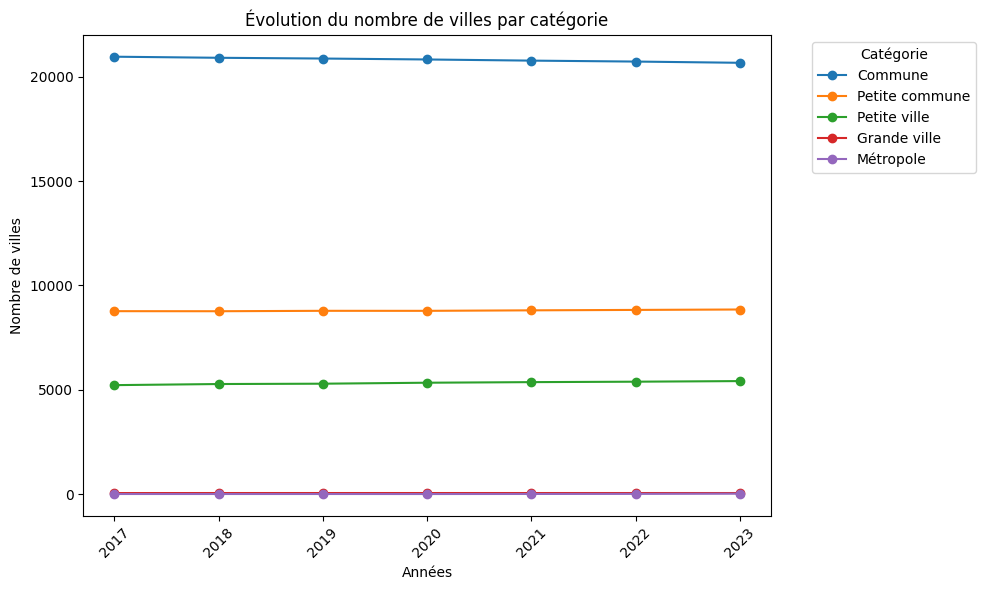

In [197]:
evolution = pd.DataFrame(columns=['catégorie', 'année', 'nombre'])

for annee in annees:
    temp_df = df[f'categorie_{annee}'].value_counts().reset_index()
    temp_df.columns = ['catégorie', 'nombre']
    temp_df['année'] = annee
    evolution = pd.concat([evolution, temp_df], ignore_index=True)

# Tracer l'évolution
plt.figure(figsize=(10, 6))
for category in evolution['catégorie'].unique():
    subset = evolution[evolution['catégorie'] == category]
    plt.plot(subset['année'], subset['nombre'], marker='o', label=category)

# Personnalisation du graphique
plt.xlabel('Années')
plt.ylabel("Nombre de villes")
plt.title("Évolution du nombre de villes par catégorie")
plt.xticks(rotation=45)
plt.legend(title='Catégorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Ajout données de votes

## 2024

In [198]:
file_path2 = '/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Habitants par ville/resultats-definitifs-par-communes.xlsx'
df_votes_2024 = pd.read_excel(file_path2)

print(df_votes_2024.head())

  Code département Libellé département Code commune          Libellé commune  \
0                1                 Ain         1001  L'Abergement-Clémenciat   
1                1                 Ain         1002    L'Abergement-de-Varey   
2                1                 Ain         1004        Ambérieu-en-Bugey   
3                1                 Ain         1005      Ambérieux-en-Dombes   
4                1                 Ain         1006                  Ambléon   

   Inscrits  Votants % Votants  Abstentions % Abstentions  Exprimés  ...  \
0       662      492    74,32%          170        25,68%       476  ...   
1       228      178    78,07%           50        21,93%       171  ...   
2      8744     6037    69,04%         2707        30,96%      5890  ...   
3      1337      960    71,80%          377        28,20%       941  ...   
4        98       68    69,39%           30        30,61%        65  ...   

  Elu 203 Numéro de panneau 204  Nuance candidat 204 Nom candi

In [199]:
print(df_votes_2024.columns)

Index(['Code département', 'Libellé département', 'Code commune',
       'Libellé commune', 'Inscrits', 'Votants', '% Votants', 'Abstentions',
       '% Abstentions', 'Exprimés',
       ...
       'Elu 203', 'Numéro de panneau 204', 'Nuance candidat 204',
       'Nom candidat 204', 'Prénom candidat 204', 'Sexe candidat 204',
       'Voix 204', '% Voix/inscrits 204', '% Voix/exprimés 204', 'Elu 204'],
      dtype='object', length=1854)


In [200]:
for colonne in df_votes_2024.columns:
  nom_colonne=colonne
  nombre_nan = df_votes_2024[nom_colonne].isna().sum()
  dif=len(df_votes_2024)-nombre_nan
  print(f"Le nombre de NaN dans la colonne '{nom_colonne}' est : {nombre_nan}")

Le nombre de NaN dans la colonne 'Code département' est : 0
Le nombre de NaN dans la colonne 'Libellé département' est : 0
Le nombre de NaN dans la colonne 'Code commune' est : 0
Le nombre de NaN dans la colonne 'Libellé commune' est : 0
Le nombre de NaN dans la colonne 'Inscrits' est : 0
Le nombre de NaN dans la colonne 'Votants' est : 0
Le nombre de NaN dans la colonne '% Votants' est : 0
Le nombre de NaN dans la colonne 'Abstentions' est : 0
Le nombre de NaN dans la colonne '% Abstentions' est : 0
Le nombre de NaN dans la colonne 'Exprimés' est : 0
Le nombre de NaN dans la colonne '% Exprimés/inscrits' est : 0
Le nombre de NaN dans la colonne '% Exprimés/votants' est : 0
Le nombre de NaN dans la colonne 'Blancs' est : 0
Le nombre de NaN dans la colonne '% Blancs/inscrits' est : 0
Le nombre de NaN dans la colonne '% Blancs/votants' est : 0
Le nombre de NaN dans la colonne 'Nuls' est : 0
Le nombre de NaN dans la colonne '% Nuls/inscrits' est : 0
Le nombre de NaN dans la colonne '% Nul

In [201]:
#on garde que la tete de liste
df_votes_2024 = df_votes_2024.iloc[:, :27]
df_votes_2024

,Code département,Libellé département,Code commune,Libellé commune,Inscrits,Votants,% Votants,Abstentions,% Abstentions,Exprimés,...,% Nuls/votants,Numéro de panneau 1,Nuance candidat 1,Nom candidat 1,Prénom candidat 1,Sexe candidat 1,Voix 1,% Voix/inscrits 1,% Voix/exprimés 1,Elu 1
0,1,Ain,1001,L'Abergement-Clémenciat,662,492,"74,32%",170,"25,68%",476,...,"1,42%",1,UG,LIOTIER,Charline,FEMININ,83,"12,54%","17,44%",NaN
1,1,Ain,1002,L'Abergement-de-Varey,228,178,"78,07%",50,"21,93%",171,...,"0,56%",1,ECO,CHATELARD,Thomas,MASCULIN,2,"0,88%","1,17%",NaN
2,1,Ain,1004,Ambérieu-en-Bugey,8744,6037,"69,04%",2707,"30,96%",5890,...,"0,78%",1,ECO,CHATELARD,Thomas,MASCULIN,51,"0,58%","0,87%",NaN
3,1,Ain,1005,Ambérieux-en-Dombes,1337,960,"71,80%",377,"28,20%",941,...,"0,73%",1,UG,LIOTIER,Charline,FEMININ,173,"12,94%","18,38%",NaN
4,1,Ain,1006,Ambléon,98,68,"69,39%",30,"30,61%",65,...,"0,00%",1,ENS,GIVERNET,Olga,FEMININ,22,"22,45%","33,85%",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35227,ZZ,Français établis hors de France,ZZ235,Bahamas (Nassau),163,50,"30,67%",113,"69,33%",50,...,"0,00%",1,DVC,AGOSTINI,Jessica,FEMININ,2,"1,23%","4,00%",NaN
35228,ZZ,Français établis hors de France,ZZ236,Astana,93,45,"48,39%",48,"51,61%",44,...,"0,00%",1,DIV,VIOLETTE,Nelly,FEMININ,0,"0,00%","0,00%",NaN
35229,ZZ,Français établis hors de France,ZZ237,Mossoul,1,0,"0,00%",1,"100,00%",0,...,0.00%,1,DIV,MOJON-CHEMINADE,Odile,FEMININ,0,"0,00%",0.00%,NaN
35230,ZZ,Français établis hors de France,ZZ238,Florence,4113,1223,"29,73%",2890,"70,27%",1199,...,"0,33%",1,DVG,CHARTRAIN,Valérie,FEMININ,28,"0,68%","2,34%",NaN


In [202]:
nan_counts = df_votes_2024[['Nuance candidat 1']].isna().sum()

print("Le nombre de NaN dans chaque colonne :")
print(nan_counts)

Le nombre de NaN dans chaque colonne :
Nuance candidat 1    0
dtype: int64


In [203]:
print(df_votes_2024['Nuance candidat 1'].unique())

['UG' 'ECO' 'ENS' 'RN' 'EXG' 'REC' 'LR' 'UDI' 'DVD' 'DSV' 'UXD' 'DIV'
 'HOR' 'DVG' 'DVC' 'REG' 'EXD' 'SOC']


In [204]:
def attribuer_parti(abreviation):
    """
    Attribue le parti politique en fonction de l'abréviation donnée.
    """
    mapping = {
        # Extrême gauche
        'EXG': 'Extrême Gauche',
        'LEXG': 'Extrême Gauche',

        # Gauche
        'UG': 'Gauche',
        'SOC': 'Gauche',
        'DVG': 'Gauche',
        'NUP' : 'Gauche',
        'FI': 'Gauche',
        'COM': 'Gauche',
        'RDG': ' Gauche',
        'VEC': 'Gauche',
        'LCOM': 'Gauche',
        'LFI': 'Gauche',
        'LSOC': 'Gauche',
        'LVEC': 'Gauche',
        'LUG': 'Gauche',
        'LDVG': 'Gauche',

        # Centre
        'DVC': 'Centre',
        'ENS': 'Centre',
        'REN': 'Centre',
        'HOR': 'Centre',
        'MDM': 'Centre',
        'LDVC': 'Centre',
        'LENS': 'Centre',
        'LREN': 'Centre',
        'LHOR': 'Centre',
        'LMDM': 'Centre',
        # Droite
        'LR': 'Droite',
        'DVD': 'Droite',
        'UDI': 'Droite',
        'DLF':  'Droite',
        'LLR': 'Droite',
        'LDVD': 'Droite',
        'LUDI': 'Droite',
        'LDLF':  'Droite',

        # Extrême droite
        'RN': 'Extrême Droite',
        'REC': 'Extrême Droite',
        'EXD': 'Extrême Droite',
        'FN': 'Extrême Droite',
        'LRN': 'Extrême Droite',
        'LUXD': 'Extrême Droite',
        'LEXD': 'Extrême Droite',
        'LFN': 'Extrême Droite',

        # Divers
        'DIV': 'Divers',
        'UXD': 'Divers',
        'DSV': 'Divers',
        'ECO': 'Divers',
        'REG': 'Divers',
        'LECO': 'Divers',
        'LREG': 'Divers',
        'LDIV': 'Divers',
    }

    return mapping.get(abreviation, 'Inconnu')


In [205]:
df_votes_2024[f'parti_Nuance candidat 1'] = df_votes_2024['Nuance candidat 1'].apply(attribuer_parti)

In [206]:
df_votes_2024['Nuance candidat 1'].unique()

array(['UG', 'ECO', 'ENS', 'RN', 'EXG', 'REC', 'LR', 'UDI', 'DVD', 'DSV',
       'UXD', 'DIV', 'HOR', 'DVG', 'DVC', 'REG', 'EXD', 'SOC'],
      dtype=object)

In [207]:
df_votes_2024

,Code département,Libellé département,Code commune,Libellé commune,Inscrits,Votants,% Votants,Abstentions,% Abstentions,Exprimés,...,Numéro de panneau 1,Nuance candidat 1,Nom candidat 1,Prénom candidat 1,Sexe candidat 1,Voix 1,% Voix/inscrits 1,% Voix/exprimés 1,Elu 1,parti_Nuance candidat 1
0,1,Ain,1001,L'Abergement-Clémenciat,662,492,"74,32%",170,"25,68%",476,...,1,UG,LIOTIER,Charline,FEMININ,83,"12,54%","17,44%",NaN,Gauche
1,1,Ain,1002,L'Abergement-de-Varey,228,178,"78,07%",50,"21,93%",171,...,1,ECO,CHATELARD,Thomas,MASCULIN,2,"0,88%","1,17%",NaN,Divers
2,1,Ain,1004,Ambérieu-en-Bugey,8744,6037,"69,04%",2707,"30,96%",5890,...,1,ECO,CHATELARD,Thomas,MASCULIN,51,"0,58%","0,87%",NaN,Divers
3,1,Ain,1005,Ambérieux-en-Dombes,1337,960,"71,80%",377,"28,20%",941,...,1,UG,LIOTIER,Charline,FEMININ,173,"12,94%","18,38%",NaN,Gauche
4,1,Ain,1006,Ambléon,98,68,"69,39%",30,"30,61%",65,...,1,ENS,GIVERNET,Olga,FEMININ,22,"22,45%","33,85%",NaN,Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35227,ZZ,Français établis hors de France,ZZ235,Bahamas (Nassau),163,50,"30,67%",113,"69,33%",50,...,1,DVC,AGOSTINI,Jessica,FEMININ,2,"1,23%","4,00%",NaN,Centre
35228,ZZ,Français établis hors de France,ZZ236,Astana,93,45,"48,39%",48,"51,61%",44,...,1,DIV,VIOLETTE,Nelly,FEMININ,0,"0,00%","0,00%",NaN,Divers
35229,ZZ,Français établis hors de France,ZZ237,Mossoul,1,0,"0,00%",1,"100,00%",0,...,1,DIV,MOJON-CHEMINADE,Odile,FEMININ,0,"0,00%",0.00%,NaN,Divers
35230,ZZ,Français établis hors de France,ZZ238,Florence,4113,1223,"29,73%",2890,"70,27%",1199,...,1,DVG,CHARTRAIN,Valérie,FEMININ,28,"0,68%","2,34%",NaN,Gauche


In [208]:
nan_counts = df_votes_2024[['parti_Nuance candidat 1']].isna().sum()

print("Le nombre de NaN dans chaque colonne :")
print(nan_counts)

Le nombre de NaN dans chaque colonne :
parti_Nuance candidat 1    0
dtype: int64


In [209]:
df_votes_2024['Libellé commune normalisé'] = df_votes_2024['Libellé commune'].apply(normaliser_nom)
df['libgeo normalisé'] = df['libgeo'].apply(normaliser_nom)


In [210]:
# Effectuer une jointure entre df_votes et df sur les colonnes Libellé commune et libgeo
df_jointure = df_votes_2024.merge(df, left_on='Libellé commune normalisé', right_on='libgeo normalisé', how='inner')
print(df_jointure.head())


  Code département Libellé département Code commune          Libellé commune  \
0                1                 Ain         1001  L'Abergement-Clémenciat   
1                1                 Ain         1002    L'Abergement-de-Varey   
2                1                 Ain         1004        Ambérieu-en-Bugey   
3                1                 Ain         1005      Ambérieux-en-Dombes   
4                1                 Ain         1006                  Ambléon   

   Inscrits  Votants % Votants  Abstentions % Abstentions  Exprimés  ...  \
0       662      492    74,32%          170        25,68%       476  ...   
1       228      178    78,07%           50        21,93%       171  ...   
2      8744     6037    69,04%         2707        30,96%      5890  ...   
3      1337      960    71,80%          377        28,20%       941  ...   
4        98       68    69,39%           30        30,61%        65  ...   

  moyenne_population  categorie_2017  categorie_2018  categori

In [211]:
print(df_jointure.columns)

Index(['Code département', 'Libellé département', 'Code commune',
       'Libellé commune', 'Inscrits', 'Votants', '% Votants', 'Abstentions',
       '% Abstentions', 'Exprimés', '% Exprimés/inscrits',
       '% Exprimés/votants', 'Blancs', '% Blancs/inscrits', '% Blancs/votants',
       'Nuls', '% Nuls/inscrits', '% Nuls/votants', 'Numéro de panneau 1',
       'Nuance candidat 1', 'Nom candidat 1', 'Prénom candidat 1',
       'Sexe candidat 1', 'Voix 1', '% Voix/inscrits 1', '% Voix/exprimés 1',
       'Elu 1', 'parti_Nuance candidat 1', 'Libellé commune normalisé',
       'objectid', 'reg', 'dep', 'cv', 'codgeo', 'libgeo', 'population 2017',
       'population 2018', 'population 2019', 'population 2020',
       'population 2021', 'population 2022', 'population 2023',
       'population 2024', 'moyenne_population', 'categorie_2017',
       'categorie_2018', 'categorie_2019', 'categorie_2020', 'categorie_2021',
       'categorie_2022', 'categorie_2023', 'categorie_2024',
       'libgeo

In [212]:
colonne_partis = ['parti_Nuance candidat 1']
categorie_colonne = 'categorie_2024'

# Calculer les occurrences des partis par catégorie
votes_par_parti = (
    df_jointure
    .melt(id_vars=categorie_colonne, value_vars=colonne_partis, var_name='nuance', value_name='parti')
    .groupby([categorie_colonne, 'parti'])
    .size()
    .rename('nombre')
    .reset_index()
)

resultats = votes_par_parti.sort_values([categorie_colonne], ascending=True)
resultats

,categorie_2024,parti,nombre
0,Commune,Centre,4179
1,Commune,Divers,3469
2,Commune,Droite,2995
3,Commune,Extrême Droite,6396
4,Commune,Extrême Gauche,3954
5,Commune,Gauche,4256
6,Grande ville,Centre,6
7,Grande ville,Divers,7
8,Grande ville,Droite,9
9,Grande ville,Extrême Droite,9


parti
Extrême Gauche    float64
Gauche            float64
Centre            float64
Droite            float64
Extrême Droite    float64
Divers            float64
dtype: object
parti           Extrême Gauche     Gauche     Centre     Droite  \
categorie_2024                                                    
Commune              15.660026  16.856113  16.551151  11.861856   
Grande ville         18.867925  22.641509  11.320755  16.981132   
Métropole            25.000000   0.000000  50.000000   0.000000   
Petite commune       16.913602  17.663335  13.397001  15.057122   
Petite ville         18.540434  15.992768  15.105194  11.374096   

parti           Extrême Droite     Divers  
categorie_2024                             
Commune              25.331696  13.739158  
Grande ville         16.981132  13.207547  
Métropole            25.000000   0.000000  
Petite commune       25.794359  11.174581  
Petite ville         23.980934  15.006575  


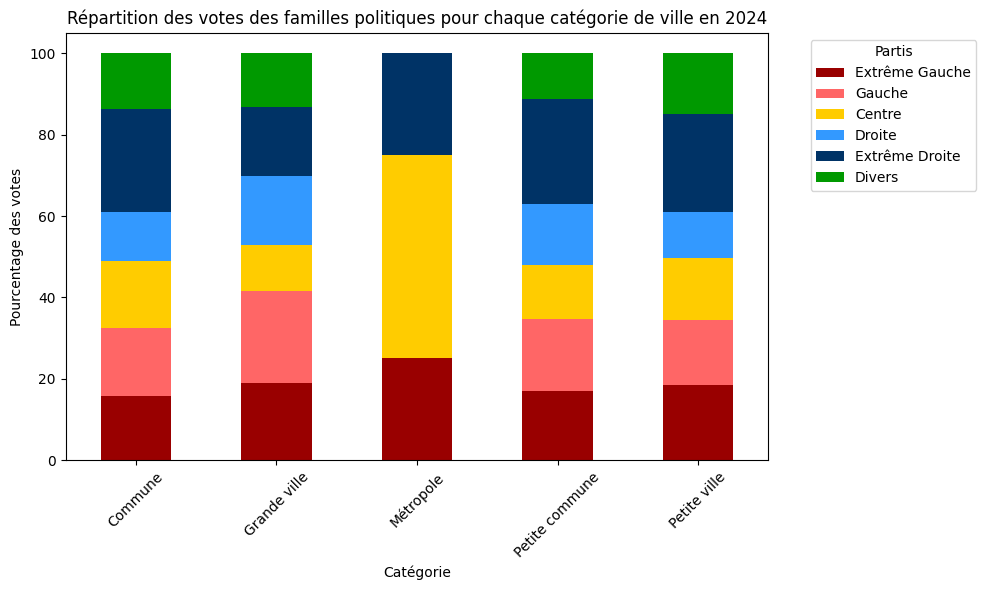

In [213]:
couleurs_partis = {
    'Extrême Gauche': '#990000',  # Rouge foncé
    'Gauche': '#FF6666',  # Rouge
    'Centre Gauche': '#FFDAB9',  # Orange clair
    'Centre': '#FFCC00',  # Jaune
    'Centre Droite': '#66CCFF',  # Bleu clair
    'Droite': '#3399FF',  # Bleu
    'Extrême Droite': '#003366',  # Bleu foncé
    'Divers': '#009900'  # Vert
}

# Calculer le total des votes par catégorie
totaux_par_categorie = (
    df_jointure
    .melt(id_vars='categorie_2024', value_vars=colonne_partis, var_name='nuance', value_name='parti')
    .groupby('categorie_2024')
    .size()
    .rename('total_votes')
    .reset_index()
)

# Calculer les occurrences des partis par catégorie
votes_par_parti = (
    df_jointure
    .melt(id_vars='categorie_2024', value_vars=colonne_partis, var_name='nuance', value_name='parti')
    .groupby(['categorie_2024', 'parti'])
    .size()
    .rename('nombre')
    .reset_index()
)

# Joindre les totaux pour calculer les pourcentages
resultats = votes_par_parti.merge(totaux_par_categorie, on='categorie_2024')
resultats['pourcentage'] = (resultats['nombre'] / resultats['total_votes']) * 100

# Trier les résultats pour une meilleure lisibilité
resultats = resultats.sort_values(['categorie_2024', 'pourcentage'], ascending=[True, False])

# Pivot des résultats pour obtenir une forme appropriée pour le graphe
resultats_pivot = resultats.pivot(index='categorie_2024', columns='parti', values='pourcentage').fillna(0)

# Réordonner les colonnes de resultats_pivot selon l'ordre dans couleurs_partis
ordre_colonnes = [parti for parti in couleurs_partis if parti in resultats_pivot.columns]
resultats_pivot = resultats_pivot[ordre_colonnes]

print(resultats_pivot.dtypes)
print(resultats_pivot.head())
# Visualiser les résultats avec un graphique à barres empilées
resultats_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[couleurs_partis[parti] for parti in ordre_colonnes]
)

# Ajouter des labels et un titre
plt.title('Répartition des votes des familles politiques pour chaque catégorie de ville en 2024')
plt.xlabel('Catégorie')
plt.ylabel('Pourcentage des votes')
plt.xticks(rotation=45)  # Rotation des catégories pour une meilleure lisibilité
plt.legend(title='Partis', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [214]:
# Effectuer le test du Khi²
table_contingence = pd.crosstab(df_jointure['categorie_2024'], df_jointure['parti_Nuance candidat 1'])
chi2, p_value, dof, expected = stats.chi2_contingency(table_contingence)

print(f"Chi2: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrés de liberté: {dof}")

if p_value < 0.05:
    print("Il existe une relation significative entre la catégorie de villes et le parti voté.")
else:
    print("Aucune relation significative détectée entre la catégorie de villes et le parti voté.")


Chi2: 225.5786221300598
p-value: 9.175569343946962e-37
Degrés de liberté: 20
Il existe une relation significative entre la catégorie de villes et le parti voté.


In [215]:
residus_standardises = (table_contingence - expected) / (expected ** 0.5)
residus_standardises
print(residus_standardises[(residus_standardises > 2) | (residus_standardises < -2)])


parti_Nuance candidat 1    Centre    Divers    Droite  Extrême Droite  \
categorie_2024                                                          
Commune                  4.194213  2.163563 -3.468865             NaN   
Grande ville                  NaN       NaN       NaN             NaN   
Métropole                     NaN       NaN       NaN             NaN   
Petite commune          -5.683048 -6.018076  7.203092             NaN   
Petite ville                  NaN  3.778546 -2.772980             NaN   

parti_Nuance candidat 1  Extrême Gauche  Gauche  
categorie_2024                                   
Commune                       -2.926727     NaN  
Grande ville                        NaN     NaN  
Métropole                           NaN     NaN  
Petite commune                      NaN     NaN  
Petite ville                   4.110187     NaN  


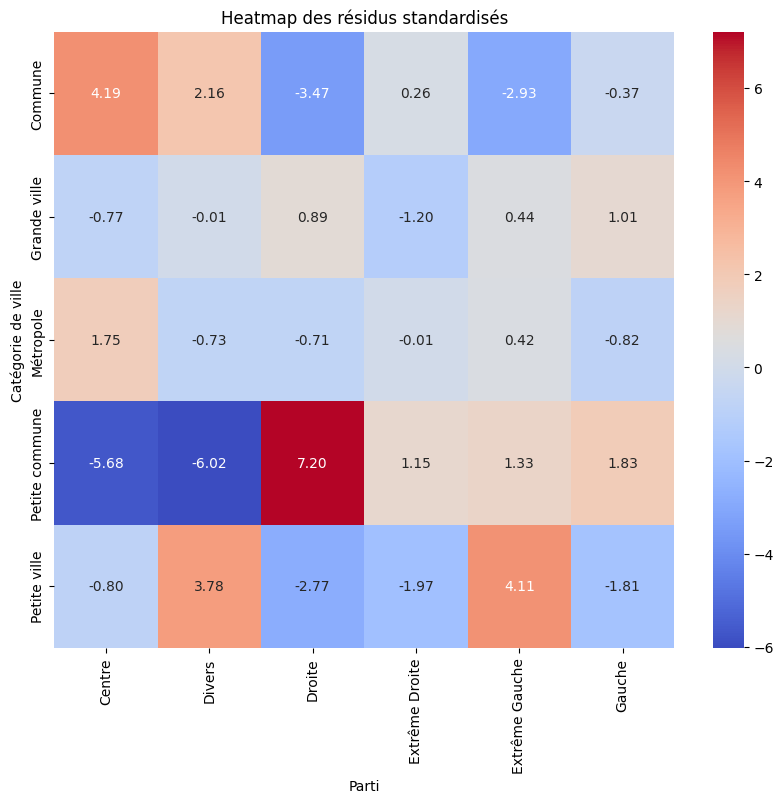

In [216]:
plt.figure(figsize=(10, 8))
sns.heatmap(residus_standardises, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap des résidus standardisés")
plt.xlabel("Parti")
plt.ylabel("Catégorie de ville")
plt.show()

AFC

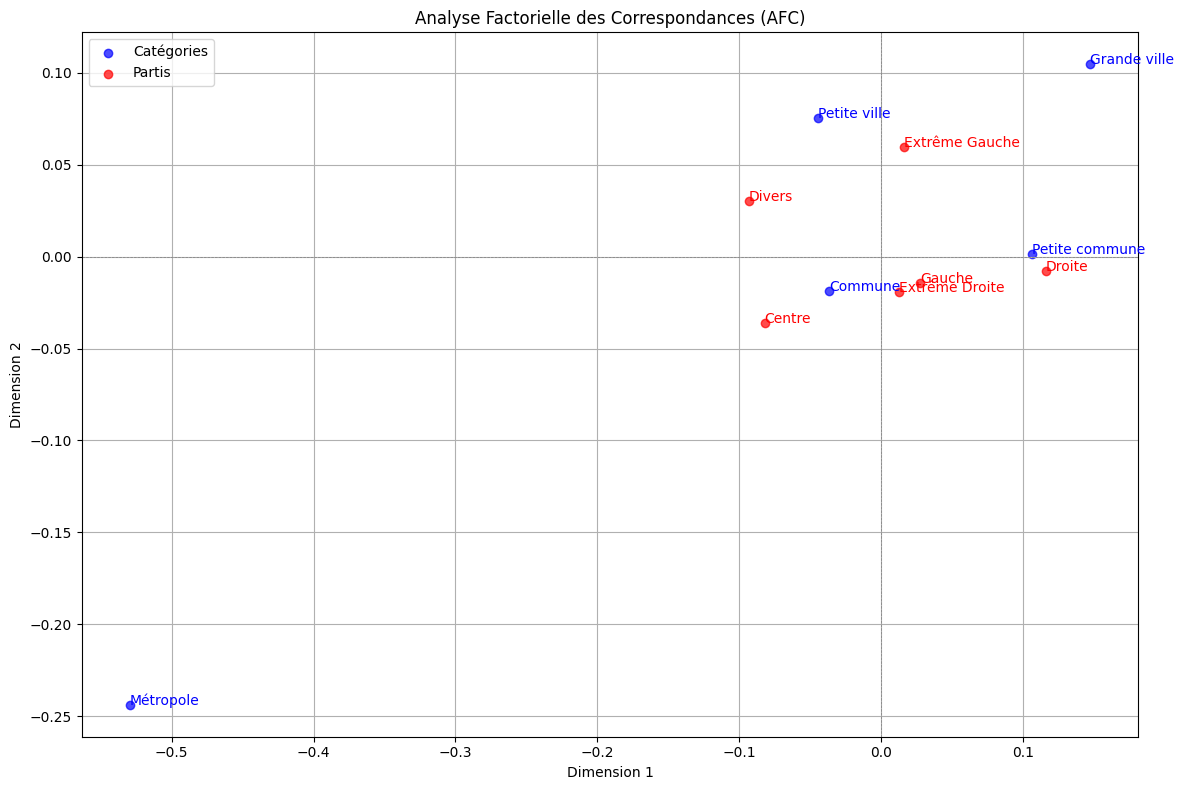

In [217]:
import prince
colonnes_pour_afc = ['categorie_2024', 'parti_Nuance candidat 1']
df_afc = df_jointure[colonnes_pour_afc].dropna()

contingency_table = pd.crosstab(df_afc['categorie_2024'], df_afc['parti_Nuance candidat 1'])

ca = prince.CA(
    n_components=2,
    n_iter=10,
    random_state=42
)
ca = ca.fit(contingency_table)

row_coords = ca.row_coordinates(contingency_table)
col_coords = ca.column_coordinates(contingency_table)

plt.figure(figsize=(12, 8))

plt.scatter(
    row_coords[0],
    row_coords[1],
    color='blue', label='Catégories', alpha=0.7
)
for i, label in enumerate(contingency_table.index):
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], label, color='blue')

plt.scatter(
    col_coords[0],
    col_coords[1],
    color='red', label='Partis', alpha=0.7
)
for i, label in enumerate(contingency_table.columns):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], label, color='red')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Analyse Factorielle des Correspondances (AFC)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()


In [218]:
row_contrib = ca.row_contributions_

col_contrib = ca.column_contributions_

print("Contributions des catégories (lignes) :")
print(row_contrib)

print("Contributions des partis (colonnes) :")
print(col_contrib)


Contributions des catégories (lignes) :
                       0         1
Commune         0.194087  0.203494
Grande ville    0.006585  0.013062
Métropole       0.006408  0.005350
Petite commune  0.723929  0.000436
Petite ville    0.068991  0.777658
Contributions des partis (colonnes) :
                       0         1
Centre          0.254442  0.194068
Divers          0.280510  0.117247
Droite          0.414014  0.007477
Extrême Droite  0.009398  0.086953
Extrême Gauche  0.010258  0.560648
Gauche          0.031377  0.033608


## 2022

In [219]:
file_path_1bis = '/content/drive/MyDrive/PIP2025_G7_Elections/Codes personnels/Code Alexia/resultats-par-niveau-subcom-t2-france-entiere-2022.xlsx'
df_votes_2022 = pd.read_excel(file_path_1bis)
print(df_votes_2022.head())

  Code du département Libellé du département  Code de la circonscription  \
0                  01                    Ain                           1   
1                  01                    Ain                           1   
2                  01                    Ain                           1   
3                  01                    Ain                           1   
4                  01                    Ain                           1   

  Libellé de la circonscription  Code de la commune Libellé de la commune  \
0          1ère circonscription                  16               Arbigny   
1          1ère circonscription                  24              Attignat   
2          1ère circonscription                  29              Beaupont   
3          1ère circonscription                  38                  Bény   
4          1ère circonscription                  40              Béréziat   

   Inscrits  Abstentions Nuance  Voix  % Voix/Exp Nuance 1  Voix 1  \
0       32

In [220]:
print(df_votes_2022.columns)

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Inscrits',
       'Abstentions', 'Nuance', 'Voix', '% Voix/Exp', 'Nuance 1', 'Voix 1',
       '% Voix/Exp 1'],
      dtype='object')


In [221]:
# Le df 2022 n'est pas rangé par parti gagnant
df_votes_2022['parti_2022'] = df_votes_2022.apply(
    lambda row: row['Nuance'] if row['% Voix/Exp'] > row['% Voix/Exp 1'] else row['Nuance 1'],
    axis=1)
df_votes_2022

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Nuance,Voix,% Voix/Exp,Nuance 1,Voix 1,% Voix/Exp 1,parti_2022
0,01,Ain,1,1ère circonscription,16,Arbigny,327,172,NUP,43,29.45,LR,103.0,70.55,LR
1,01,Ain,1,1ère circonscription,24,Attignat,2455,1302,NUP,359,32.64,LR,741.0,67.36,LR
2,01,Ain,1,1ère circonscription,29,Beaupont,446,239,NUP,67,34.36,LR,128.0,65.64,LR
3,01,Ain,1,1ère circonscription,38,Bény,604,317,NUP,108,39.27,LR,167.0,60.73,LR
4,01,Ain,1,1ère circonscription,40,Béréziat,362,196,NUP,53,32.72,LR,109.0,67.28,LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35320,ZZ,Français établis hors de France,11,11ème circonscription,221,Vientiane,1438,1167,NUP,152,59.14,ENS,105.0,40.86,NUP
35321,ZZ,Français établis hors de France,11,11ème circonscription,224,Wellington,4395,3290,NUP,576,54.34,ENS,484.0,45.66,NUP
35322,ZZ,Français établis hors de France,11,11ème circonscription,226,Wuhan,181,115,NUP,23,39.66,ENS,35.0,60.34,ENS
35323,ZZ,Français établis hors de France,11,11ème circonscription,231,Taipei,1733,1192,NUP,251,48.46,ENS,267.0,51.54,ENS


In [222]:
df_votes_2022 = df_votes_2022.iloc[:, :28]
df_votes_2022

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Nuance,Voix,% Voix/Exp,Nuance 1,Voix 1,% Voix/Exp 1,parti_2022
0,01,Ain,1,1ère circonscription,16,Arbigny,327,172,NUP,43,29.45,LR,103.0,70.55,LR
1,01,Ain,1,1ère circonscription,24,Attignat,2455,1302,NUP,359,32.64,LR,741.0,67.36,LR
2,01,Ain,1,1ère circonscription,29,Beaupont,446,239,NUP,67,34.36,LR,128.0,65.64,LR
3,01,Ain,1,1ère circonscription,38,Bény,604,317,NUP,108,39.27,LR,167.0,60.73,LR
4,01,Ain,1,1ère circonscription,40,Béréziat,362,196,NUP,53,32.72,LR,109.0,67.28,LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35320,ZZ,Français établis hors de France,11,11ème circonscription,221,Vientiane,1438,1167,NUP,152,59.14,ENS,105.0,40.86,NUP
35321,ZZ,Français établis hors de France,11,11ème circonscription,224,Wellington,4395,3290,NUP,576,54.34,ENS,484.0,45.66,NUP
35322,ZZ,Français établis hors de France,11,11ème circonscription,226,Wuhan,181,115,NUP,23,39.66,ENS,35.0,60.34,ENS
35323,ZZ,Français établis hors de France,11,11ème circonscription,231,Taipei,1733,1192,NUP,251,48.46,ENS,267.0,51.54,ENS


In [223]:
df_votes_2022['Libellé de la commune'] = df_votes_2022['Libellé de la commune'].apply(normaliser_nom)
df_votes_2022

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Nuance,Voix,% Voix/Exp,Nuance 1,Voix 1,% Voix/Exp 1,parti_2022
0,01,Ain,1,1ère circonscription,16,arbigny,327,172,NUP,43,29.45,LR,103.0,70.55,LR
1,01,Ain,1,1ère circonscription,24,attignat,2455,1302,NUP,359,32.64,LR,741.0,67.36,LR
2,01,Ain,1,1ère circonscription,29,beaupont,446,239,NUP,67,34.36,LR,128.0,65.64,LR
3,01,Ain,1,1ère circonscription,38,beny,604,317,NUP,108,39.27,LR,167.0,60.73,LR
4,01,Ain,1,1ère circonscription,40,bereziat,362,196,NUP,53,32.72,LR,109.0,67.28,LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35320,ZZ,Français établis hors de France,11,11ème circonscription,221,vientiane,1438,1167,NUP,152,59.14,ENS,105.0,40.86,NUP
35321,ZZ,Français établis hors de France,11,11ème circonscription,224,wellington,4395,3290,NUP,576,54.34,ENS,484.0,45.66,NUP
35322,ZZ,Français établis hors de France,11,11ème circonscription,226,wuhan,181,115,NUP,23,39.66,ENS,35.0,60.34,ENS
35323,ZZ,Français établis hors de France,11,11ème circonscription,231,taipei,1733,1192,NUP,251,48.46,ENS,267.0,51.54,ENS


In [224]:
nb_inconnu = df_votes_2022['Nuance'].value_counts().get('Inconnu', 0)
nb_inconnu

0

In [225]:
df_votes_2022['parti 2022'] = df_votes_2022['parti_2022'].apply(attribuer_parti)
df_votes_2022

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Nuance,Voix,% Voix/Exp,Nuance 1,Voix 1,% Voix/Exp 1,parti_2022,parti 2022
0,01,Ain,1,1ère circonscription,16,arbigny,327,172,NUP,43,29.45,LR,103.0,70.55,LR,Droite
1,01,Ain,1,1ère circonscription,24,attignat,2455,1302,NUP,359,32.64,LR,741.0,67.36,LR,Droite
2,01,Ain,1,1ère circonscription,29,beaupont,446,239,NUP,67,34.36,LR,128.0,65.64,LR,Droite
3,01,Ain,1,1ère circonscription,38,beny,604,317,NUP,108,39.27,LR,167.0,60.73,LR,Droite
4,01,Ain,1,1ère circonscription,40,bereziat,362,196,NUP,53,32.72,LR,109.0,67.28,LR,Droite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35320,ZZ,Français établis hors de France,11,11ème circonscription,221,vientiane,1438,1167,NUP,152,59.14,ENS,105.0,40.86,NUP,Gauche
35321,ZZ,Français établis hors de France,11,11ème circonscription,224,wellington,4395,3290,NUP,576,54.34,ENS,484.0,45.66,NUP,Gauche
35322,ZZ,Français établis hors de France,11,11ème circonscription,226,wuhan,181,115,NUP,23,39.66,ENS,35.0,60.34,ENS,Centre
35323,ZZ,Français établis hors de France,11,11ème circonscription,231,taipei,1733,1192,NUP,251,48.46,ENS,267.0,51.54,ENS,Centre


In [226]:
# Effectuer une jointure entre df_votes et df sur les colonnes Libellé commune et libgeo
df_jointure_2022 = df_votes_2022.merge(df, left_on='Libellé de la commune', right_on='libgeo normalisé', how='inner')
print(df_jointure_2022.head())
df_jointure_2022 ['parti 2022']

  Code du département Libellé du département  Code de la circonscription  \
0                  01                    Ain                           1   
1                  01                    Ain                           1   
2                  01                    Ain                           1   
3                  01                    Ain                           1   
4                  01                    Ain                           1   

  Libellé de la circonscription  Code de la commune Libellé de la commune  \
0          1ère circonscription                  16               arbigny   
1          1ère circonscription                  24              attignat   
2          1ère circonscription                  29              beaupont   
3          1ère circonscription                  38                  beny   
4          1ère circonscription                  40              bereziat   

   Inscrits  Abstentions Nuance  Voix  ...  moyenne_population categorie_2017  \

,parti 2022
0,Droite
1,Droite
2,Droite
3,Droite
4,Droite
...,...
42591,Centre
42592,Centre
42593,Centre
42594,Centre


In [227]:
df_jointure_2022.columns

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Inscrits',
       'Abstentions', 'Nuance', 'Voix', '% Voix/Exp', 'Nuance 1', 'Voix 1',
       '% Voix/Exp 1', 'parti_2022', 'parti 2022', 'objectid', 'reg', 'dep',
       'cv', 'codgeo', 'libgeo', 'population 2017', 'population 2018',
       'population 2019', 'population 2020', 'population 2021',
       'population 2022', 'population 2023', 'population 2024',
       'moyenne_population', 'categorie_2017', 'categorie_2018',
       'categorie_2019', 'categorie_2020', 'categorie_2021', 'categorie_2022',
       'categorie_2023', 'categorie_2024', 'libgeo normalisé'],
      dtype='object')

In [228]:
colonne_partis = ['parti 2022']
categorie_colonne = 'categorie_2022'

# Calculer les occurrences des partis par catégorie
votes_par_parti = (
    df_jointure_2022
    .melt(id_vars=categorie_colonne, value_vars=colonne_partis, var_name='nuance', value_name='parti')
    .groupby([categorie_colonne, 'parti'])
    .size()
    .rename('nombre')
    .reset_index()
)

resultats = votes_par_parti.sort_values([categorie_colonne], ascending=True)
resultats


,categorie_2022,parti,nombre
0,Commune,Centre,8162
1,Commune,Divers,173
2,Commune,Droite,4550
3,Commune,Extrême Droite,7136
4,Commune,Gauche,5284
5,Commune,Inconnu,7
6,Grande ville,Centre,32
7,Grande ville,Droite,4
8,Grande ville,Extrême Droite,9
9,Grande ville,Gauche,72


In [229]:
df_jointure_2022['parti 2022'].unique()

array(['Droite', 'Gauche', 'Centre', 'Extrême Droite', 'Divers',
       'Inconnu'], dtype=object)

In [230]:
df_jointure_2022.columns

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Inscrits',
       'Abstentions', 'Nuance', 'Voix', '% Voix/Exp', 'Nuance 1', 'Voix 1',
       '% Voix/Exp 1', 'parti_2022', 'parti 2022', 'objectid', 'reg', 'dep',
       'cv', 'codgeo', 'libgeo', 'population 2017', 'population 2018',
       'population 2019', 'population 2020', 'population 2021',
       'population 2022', 'population 2023', 'population 2024',
       'moyenne_population', 'categorie_2017', 'categorie_2018',
       'categorie_2019', 'categorie_2020', 'categorie_2021', 'categorie_2022',
       'categorie_2023', 'categorie_2024', 'libgeo normalisé'],
      dtype='object')

In [231]:
df_votes_2022.columns

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Inscrits',
       'Abstentions', 'Nuance', 'Voix', '% Voix/Exp', 'Nuance 1', 'Voix 1',
       '% Voix/Exp 1', 'parti_2022', 'parti 2022'],
      dtype='object')

In [232]:
resultats['pourcentage'] = df_votes_2022.apply(
    lambda row: row['% Voix/Exp'] if row['% Voix/Exp'] > row['% Voix/Exp 1'] else row['% Voix/Exp 1'], axis=1
)

parti
Gauche            float64
Centre            float64
Droite            float64
Extrême Droite    float64
Divers            float64
dtype: object
parti           Gauche  Centre  Droite  Extrême Droite  Divers
categorie_2022                                                
Commune          67.28   70.55   65.64           60.73   67.36
Grande ville     60.32   54.02   58.87           66.52    0.00
Métropole        69.96   65.28    0.00            0.00    0.00
Petite commune   64.49   52.32   61.90           63.68   69.55
Petite ville     68.06   78.80   64.55           62.22   54.55


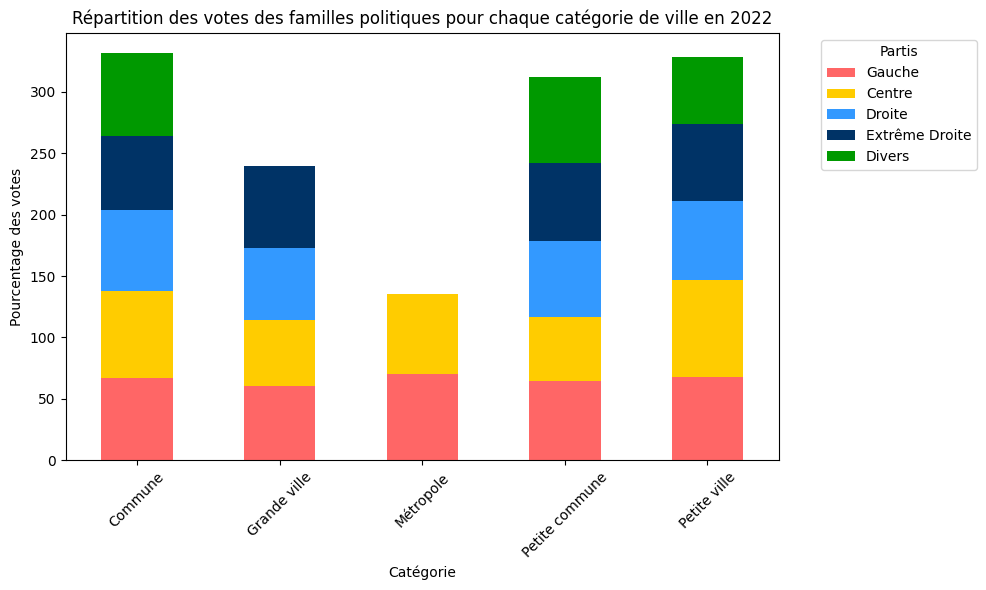

In [233]:
couleurs_partis = {
    'Extrême Gauche': '#990000',  # Rouge foncé
    'Gauche': '#FF6666',  # Rouge
    'Centre Gauche': '#FFDAB9',  # Orange clair
    'Centre': '#FFCC00',  # Jaune
    'Centre Droite': '#66CCFF',  # Bleu clair
    'Droite': '#3399FF',  # Bleu
    'Extrême Droite': '#003366',  # Bleu foncé
    'Divers': '#009900'  # Vert
}

# Calculer le total des votes par catégorie pour 2022
totaux_par_categorie = (
    df_jointure_2022
    .melt(id_vars='categorie_2022', value_vars='parti 2022', var_name='nuance', value_name='parti')
    .groupby('categorie_2022')
    .size()
    .rename('total_votes')
    .reset_index()
)

# Calculer les occurrences des partis par catégorie pour 2022
votes_par_parti = (
    df_jointure_2022
    .melt(id_vars='categorie_2022', value_vars='parti 2022', var_name='nuance', value_name='parti')
    .groupby(['categorie_2022', 'parti'])
    .size()
    .rename('nombre')
    .reset_index()
)
resultats['pourcentage'] = df_votes_2022.apply(
    lambda row: row['% Voix/Exp'] if row['% Voix/Exp'] > row['% Voix/Exp 1'] else row['% Voix/Exp 1'], axis=1
)
resultats = resultats.sort_values(['categorie_2022', 'pourcentage'], ascending=[True, False])
resultats_pivot = resultats.pivot(index='categorie_2022', columns='parti', values='pourcentage').fillna(0)

# Réordonner les colonnes de resultats_pivot selon l'ordre dans couleurs_partis
ordre_colonnes = [parti for parti in couleurs_partis if parti in resultats_pivot.columns]
resultats_pivot = resultats_pivot[ordre_colonnes]

print(resultats_pivot.dtypes)
print(resultats_pivot.head())

resultats_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[couleurs_partis[parti] for parti in ordre_colonnes]
)

plt.title('Répartition des votes des familles politiques pour chaque catégorie de ville en 2022')
plt.xlabel('Catégorie')
plt.ylabel('Pourcentage des votes')
plt.xticks(rotation=45)
plt.legend(title='Partis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Age


In [234]:
df_menages_communes = pd.read_csv('/content/drive/MyDrive/PIP2025_G7_Elections/Analyse approfondie/Analyse socio - Législatives/Données/Age/agesexdepartements.csv', sep=",", encoding="utf-8")
df_menages_communes.head()

,dep,nomdep,popf1851,popf1852,popf1853,popf1854,popf1855,popf1856,popf1857,popf1858,...,pop2022,propf2022,propf0142022,propf15392022,propf40592022,propf60p2022,prop0142022,prop15392022,prop40592022,prop60p2022
0,01,AIN,183106,182908,182709,182511,182312,182114,182381,182648,...,685222,0.507310,0.486327,0.497601,0.502847,0.540233,0.195267,0.280106,0.279654,0.244973
1,02,AISNE,282996,282647,282297,281948,281598,281249,281638,282027,...,538165,0.509767,0.485897,0.491876,0.501770,0.548720,0.185707,0.268425,0.256178,0.289690
2,03,ALLIER,166379,167909,169439,170969,172499,174029,175282,176536,...,337854,0.522587,0.483655,0.495466,0.523030,0.555061,0.150216,0.227157,0.256333,0.366294
3,04,ALPES-DE-HAUTE-PROVENCE,73351,73119,72888,72656,72425,72193,71814,71435,...,167076,0.511857,0.483704,0.492477,0.514631,0.535328,0.153894,0.233906,0.265903,0.346297
4,05,HAUTES-ALPES,63609,63370,63131,62891,62652,62413,62183,61953,...,147898,0.506295,0.458073,0.484458,0.506152,0.546363,0.163281,0.242316,0.264885,0.329518


In [235]:
df_menages_communes.columns

Index(['dep', 'nomdep', 'popf1851', 'popf1852', 'popf1853', 'popf1854',
       'popf1855', 'popf1856', 'popf1857', 'popf1858',
       ...
       'pop2022', 'propf2022', 'propf0142022', 'propf15392022',
       'propf40592022', 'propf60p2022', 'prop0142022', 'prop15392022',
       'prop40592022', 'prop60p2022'],
      dtype='object', length=3631)

In [236]:
print(df_menages_communes.isnull().sum())

dep             0
nomdep          0
popf1851        0
popf1852        0
popf1853        0
               ..
propf60p2022    0
prop0142022     0
prop15392022    0
prop40592022    0
prop60p2022     0
Length: 3631, dtype: int64


In [237]:
# Conserver les 2 premières colonnes
colonnes_debut = df_menages_communes.iloc[:, :2]

# Conserver les 70 dernières colonnes
colonnes_fin = df_menages_communes.iloc[:, -60:]

# Combiner les deux ensembles
df = pd.concat([colonnes_debut, colonnes_fin], axis=1)
print(df)

   dep                   nomdep  pop2017  propf2017  propf0142017  \
0   01                      AIN   646053   0.506657      0.488811   
1   02                    AISNE   535317   0.512087      0.486955   
2   03                   ALLIER   338589   0.522539      0.489959   
3   04  ALPES-DE-HAUTE-PROVENCE   163249   0.513100      0.480902   
4   05             HAUTES-ALPES   142073   0.509323      0.476622   
..  ..                      ...      ...        ...           ...   
91  91                  ESSONNE  1300343   0.511224      0.494243   
92  92           HAUTS-DE-SEINE  1607675   0.523651      0.491910   
93  93        SEINE-SAINT-DENIS  1621793   0.507734      0.492533   
94  94             VAL-DE-MARNE  1386876   0.519062      0.489236   
95  95               VAL-D'OISE  1230600   0.515018      0.492083   

    propf15392017  propf40592017  propf60p2017  prop0142017  prop15392017  \
0        0.494783       0.501227      0.543628     0.199409      0.290628   
1        0.495995

In [242]:
df.columns

Index(['dep', 'nomdep', 'pop2017', 'propf2017', 'propf0142017',
       'propf15392017', 'propf40592017', 'propf60p2017', 'prop0142017',
       'prop15392017', 'prop40592017', 'prop60p2017', 'pop2018', 'propf2018',
       'propf0142018', 'propf15392018', 'propf40592018', 'propf60p2018',
       'prop0142018', 'prop15392018', 'prop40592018', 'prop60p2018', 'pop2019',
       'propf2019', 'propf0142019', 'propf15392019', 'propf40592019',
       'propf60p2019', 'prop0142019', 'prop15392019', 'prop40592019',
       'prop60p2019', 'pop2020', 'propf2020', 'propf0142020', 'propf15392020',
       'propf40592020', 'propf60p2020', 'prop0142020', 'prop15392020',
       'prop40592020', 'prop60p2020', 'pop2021', 'propf2021', 'propf0142021',
       'propf15392021', 'propf40592021', 'propf60p2021', 'prop0142021',
       'prop15392021', 'prop40592021', 'prop60p2021', 'pop2022', 'propf2022',
       'propf0142022', 'propf15392022', 'propf40592022', 'propf60p2022',
       'prop0142022', 'prop15392022', 'pro

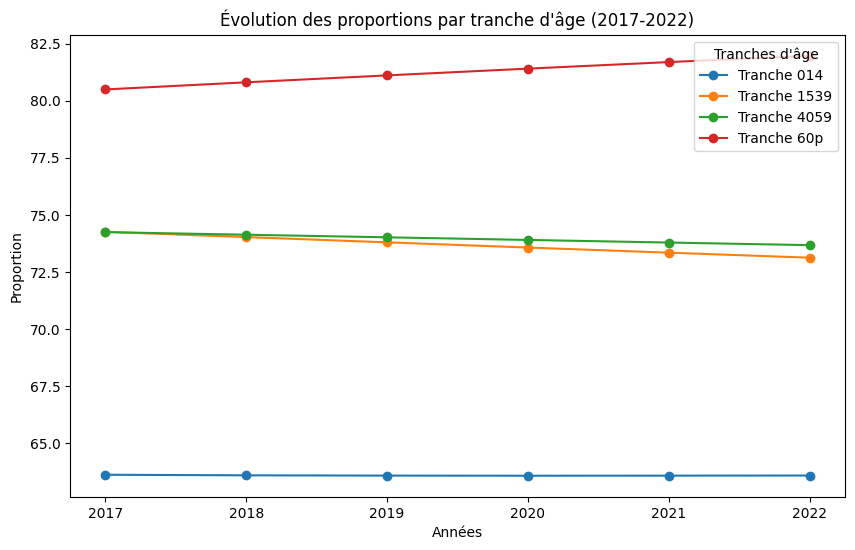

In [245]:
tranches_ages = ["014", "1539", "4059", "60p"]
annees = [2017, 2018, 2019, 2020, 2021, 2022]

for annee in annees:
    for tranche in tranches_ages:
        df[f"prop_{tranche}{annee}"] = df[f"propf{tranche}{annee}"] + df[f"prop{tranche}{annee}"]

plt.figure(figsize=(10, 6))

for tranche in tranches_ages:
    proportions = [df[f"prop_{tranche}{annee}"].sum() for annee in annees]
    plt.plot(annees, proportions, marker='o', label=f"Tranche {tranche}")

plt.title("Évolution des proportions par tranche d'âge (2017-2022)")
plt.xlabel("Années")
plt.ylabel("Proportion")
plt.legend(title="Tranches d'âge")

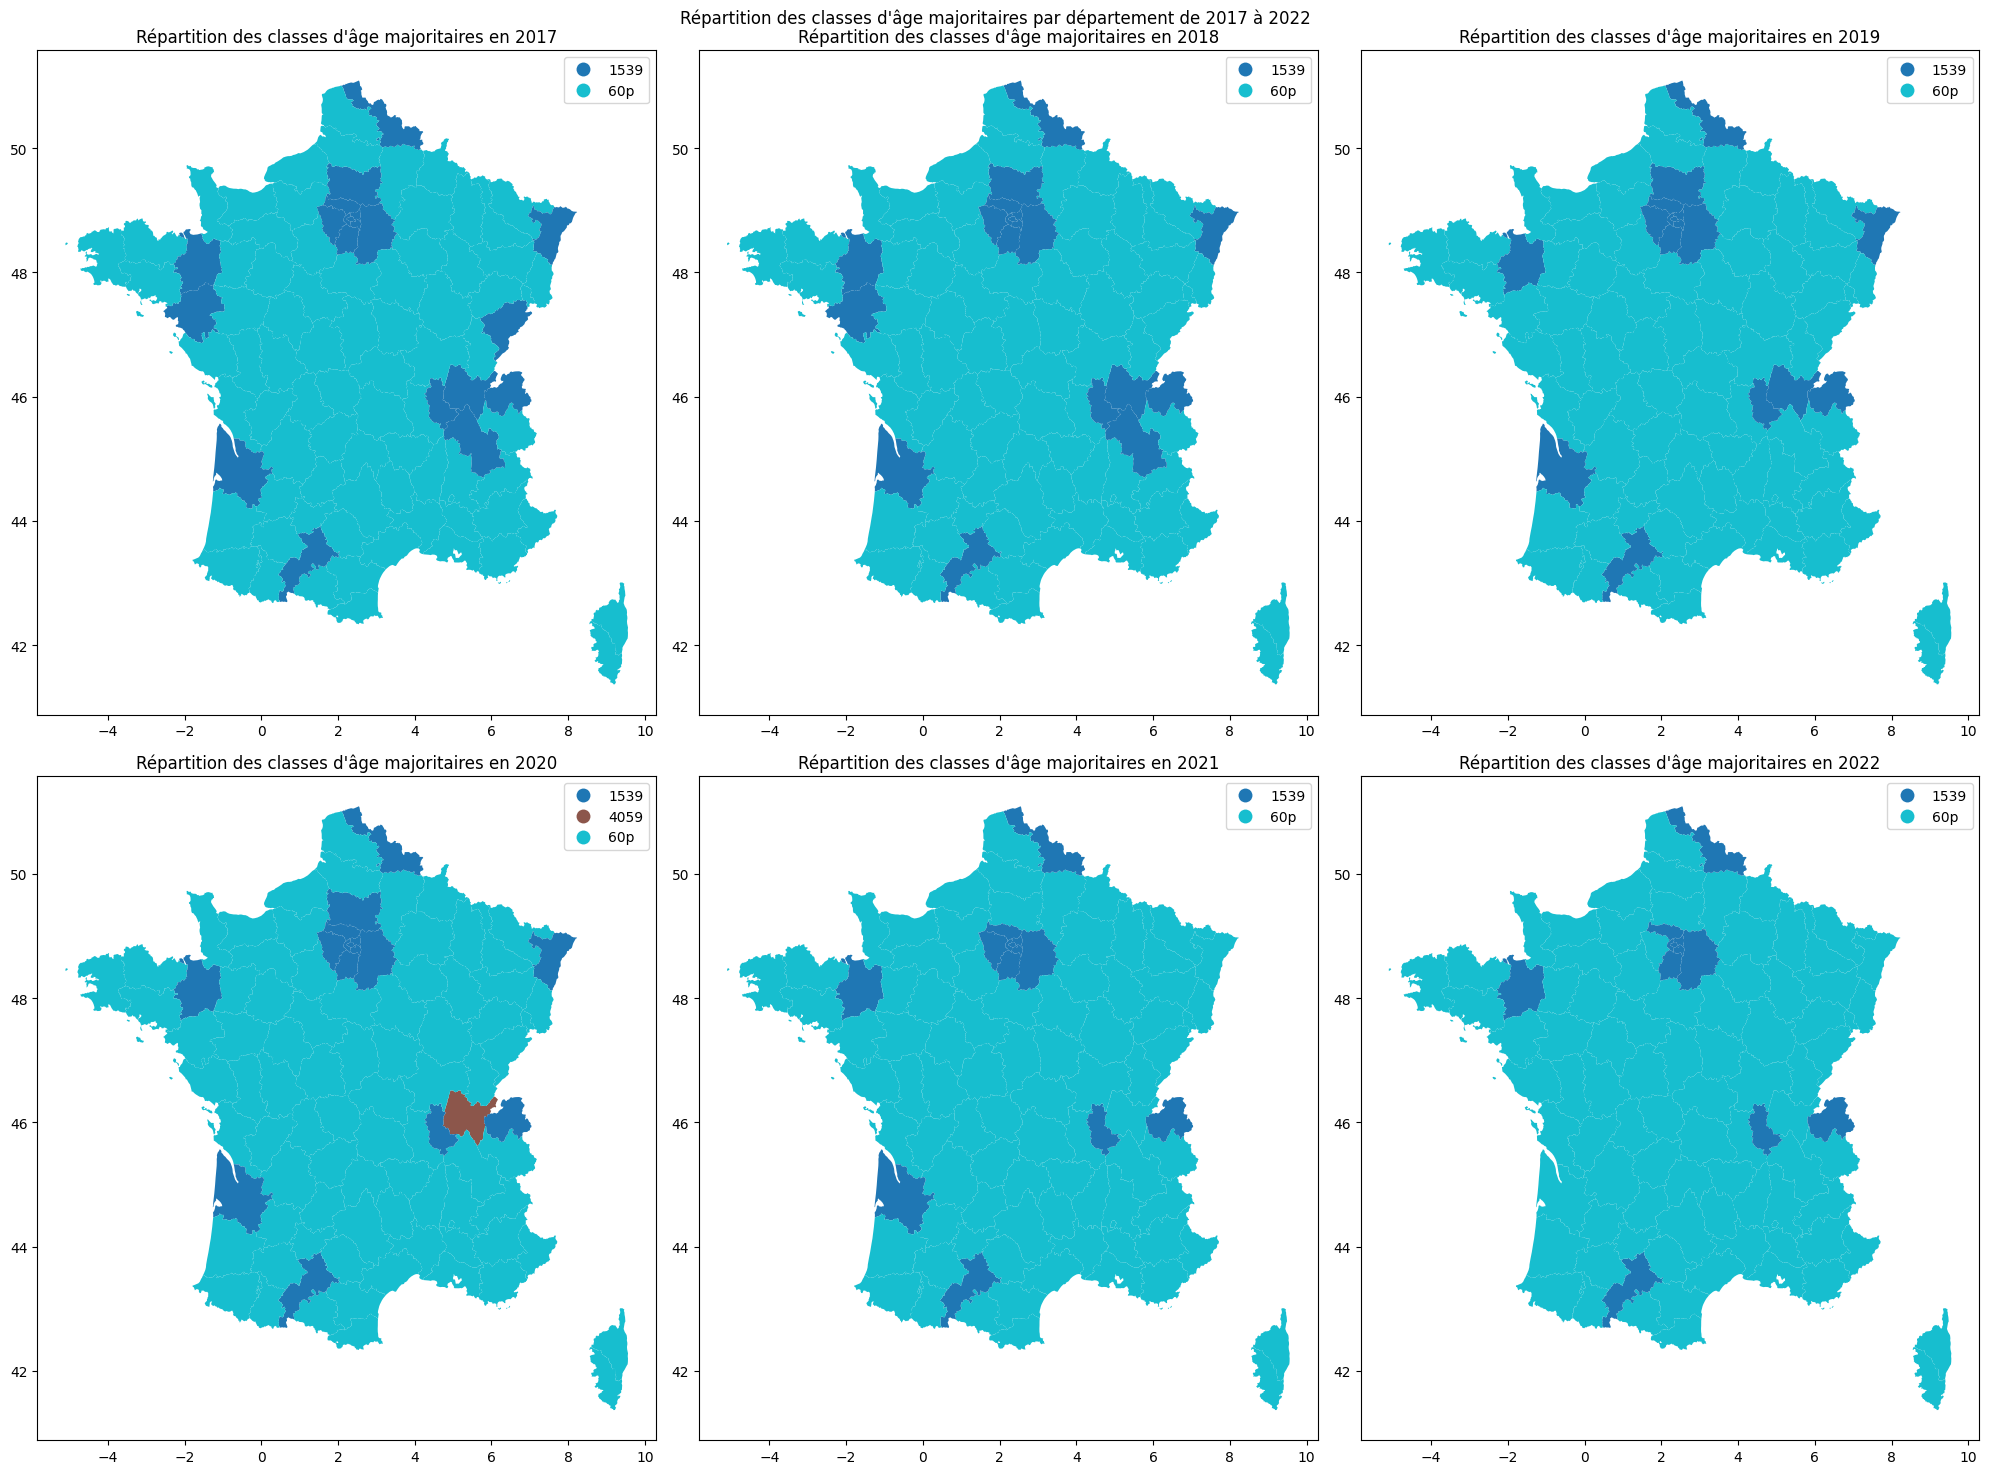

In [246]:
tranches_ages = ["014", "1539", "4059", "60p"]
annees = [2017, 2018, 2019, 2020, 2021, 2022]

for annee in annees:
    for tranche in tranches_ages:
        df[f"prop_{tranche}{annee}"] = df[f"propf{tranche}{annee}"] + df[f"prop{tranche}{annee}"]

def tranche_majoritaire(row, annee):
    proportions = [row[f"prop_{tranche}{annee}"] for tranche in tranches_ages]
    max_index = proportions.index(max(proportions))
    return tranches_ages[max_index]

for annee in annees:
    df[f"tranche_majoritaire_{annee}"] = df.apply(lambda row: tranche_majoritaire(row, annee), axis=1)

url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
departments = gpd.read_file(url)

departments = departments.merge(df, left_on="code", right_on="dep", how="left")

fig, axes = plt.subplots(2, 3, figsize=(20, 15))

for i, annee in enumerate(annees):
    ax = axes[i // 3, i % 3]
    departments.dropna(subset=[f"tranche_majoritaire_{annee}"], inplace=True)
    departments.plot(column=f"tranche_majoritaire_{annee}",
                     cmap="tab10",
                     legend=True,
                     ax=ax)
    ax.set_title(f"Répartition des classes d'âge majoritaires en {annee}")
    ax.set_aspect('auto')

plt.suptitle("Répartition des classes d'âge majoritaires par département de 2017 à 2022")
plt.tight_layout()
plt.show()

# Pour streamlit

In [ ]:
df_jointure_2022.to_csv('df_jointure_2022.csv', index=False)
df_jointure.to_csv('df_jointure_2024.csv', index=False)